In [1]:
import os
# import codecs
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

import missingno as msno

Using TensorFlow backend.


In [2]:
df = pd.read_csv('hello.csv', encoding='utf-8')
df.head()

C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,city,district,dong,apart,exclusive_area_m2,price,floor,date,pre-sale_area_m2,moving_date,pre-sale_date,pre-sale_price,house_num,num_for_each_area,price_by3.3m2_exclusive,price_by3.3m2_pre_area,price_by3.3m2_pre_price
0,서울특별시,강남구,압구정동,구현대1차,196.21,"450,000",13,2018.12,211.23,1976.06,NaN,NaN,480,120,"7,582","7,043",NaN
1,서울특별시,강남구,청담동,마크힐스2단지,202.58,"450,000",5,2018.12,252.31,2010.07,2009.05,"600,000",19,1,"7,343","5,896","7,861"
2,서울특별시,강남구,압구정동,신현대,139.83,"320,000",7,2018.12,165.29,1982.04,NaN,NaN,"1,924",168,"7,565","6,400",NaN
3,서울특별시,강남구,대치동,한보미도맨션1차,191.04,"315,000",2,2018.12,219.22,1983.12,NaN,"8,978","1,204",84,"5,451","4,750",135
4,서울특별시,강남구,압구정동,구현대7차,144.20,"304,000",10,2018.12,158.68,1979.05,NaN,NaN,560,168,"6,969","6,333",NaN


city : 0
district : 0
dong : 0
apart : 0
exclusive_area_m2 : 0
price : 0
floor : 0
date : 0
pre-sale_area_m2 : 0
moving_date : 0
pre-sale_date : 536391
pre-sale_price : 279225
house_num : 0
num_for_each_area : 5
price_by3.3m2_exclusive : 25
price_by3.3m2_pre_area : 0
price_by3.3m2_pre_price : 279225
AxesSubplot(0.125,0.125;0.698618x0.755)


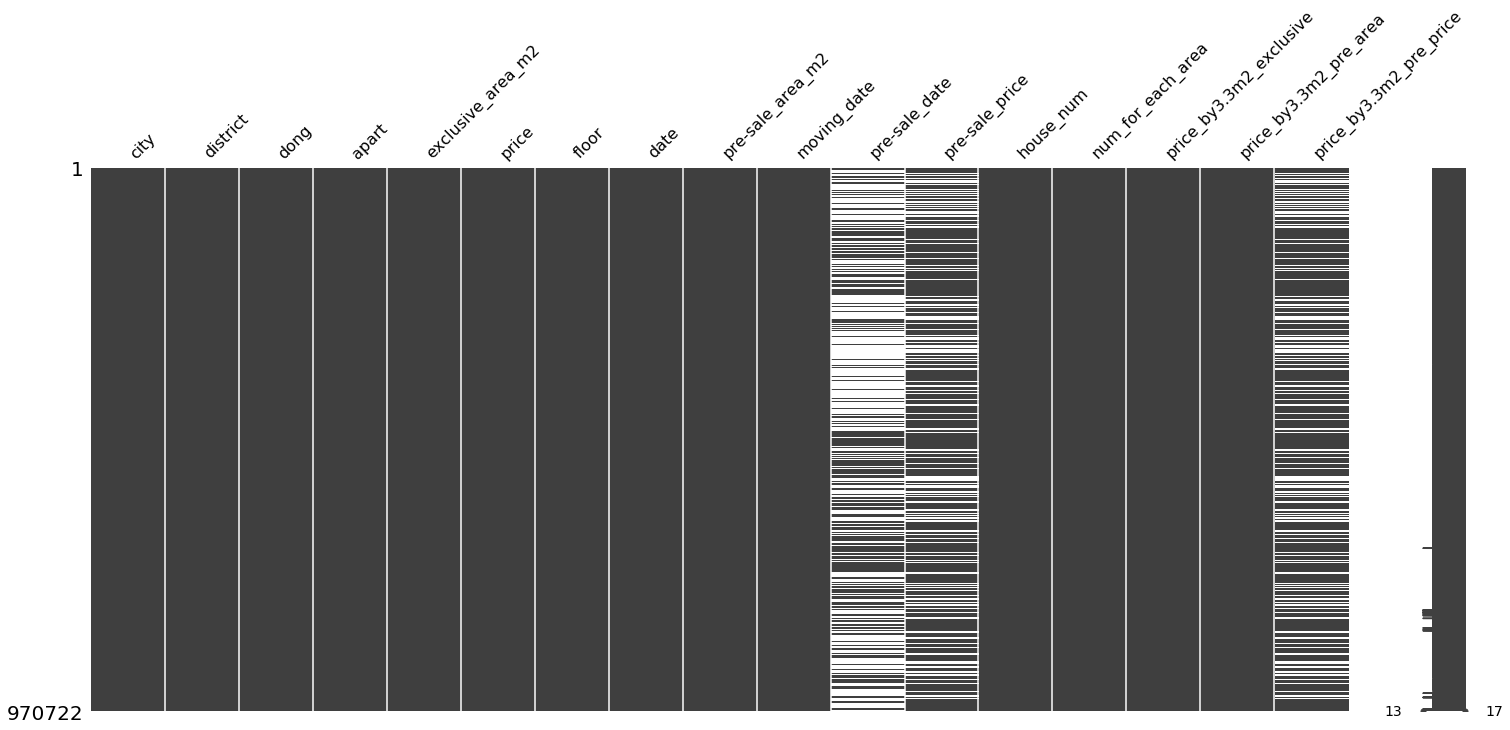

In [3]:
for c in df.columns:
    print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]),c].values)))
print(msno.matrix(df))

In [4]:
# 도시, 행정구, 동,아파트를 라벨 인코딩 함
le = LabelEncoder()
list1 = ['city', 'district', 'dong', 'apart']
for i in list1:
    temp = df[i].to_frame()
    df[i] = temp.apply(le.fit_transform)
    
df['year'] = df['date'].apply(lambda x: str(x)[:4]).astype(str)
df['month'] = df['date'].apply(lambda x: str(x)[5:7]).astype(str)
del df['date']
df.tail()

,city,district,dong,apart,exclusive_area_m2,price,floor,pre-sale_area_m2,moving_date,pre-sale_date,pre-sale_price,house_num,num_for_each_area,price_by3.3m2_exclusive,price_by3.3m2_pre_area,price_by3.3m2_pre_price,year,month
970717,0,24,91,2492,39.84,"16,650",4,56.20,1996.06,NaN,NaN,"1,070",420,"1,382",979,NaN,2018,11
970718,0,24,85,1399,35.30,"16,100",8,46.28,1988.12,NaN,NaN,"1,362",300,"1,508","1,150",NaN,2018,03
970719,0,24,83,179,41.88,"15,500",5,56.20,1988.05,NaN,NaN,78,78,"1,223",912,NaN,2018,07
970720,0,24,161,2494,33.18,"15,500",1,46.28,1996.05,NaN,"4,500","1,650",486,"1,544","1,107",321,2018,05
970721,0,24,83,179,41.88,"15,000",5,56.20,1988.05,NaN,NaN,78,78,"1,184",882,NaN,2018,08


In [7]:
list = ['price','pre-sale_price','house_num','num_for_each_area','price_by3.3m2_exclusive','price_by3.3m2_pre_area','price_by3.3m2_pre_price']
for i in list:
    df[i] = df[i].apply(lambda x: str(x.replace('nan',"0"))
    df[i] = df[i].apply(lambda x: float(str(x).replace(",","")))
y = df['price']
del df['price']
# 분양일은 절반 이상 비어있고, 아파트 단지별로 분양일이 비슷할걸로 생각해서 그냥 지움
del df['pre-sale_date']
# 분양가와 평당 분양가는 1/4정도 비어있지만, 일단 지움
del df['pre-sale_price']
del df['price_by3.3m2_pre_price']
df.tail()

SyntaxError: invalid syntax (<ipython-input-7-5d1b8e22e0d8>, line 4)

In [9]:
for c in df.columns:
    print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]),c].values)))
    
hi = df[945863:945864]['num_for_each_area'].values
type(hi[0])

city : 0
district : 0
dong : 0
apart : 0
exclusive_area_m2 : 0
floor : 0
pre-sale_area_m2 : 0
moving_date : 0
house_num : 0
num_for_each_area : 0
price_by3.3m2_exclusive : 0
price_by3.3m2_pre_area : 0
year : 0
month : 0


numpy.float64

In [10]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)
print(df.shape)

(970722, 14)


In [11]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=seed)

In [12]:
model = Sequential()
model.add(Dense(240, input_dim=14, activation='relu'))
model.add(Dense(720, activation='relu'))
model.add(Dense(1440, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

# 모델 실행 및 저장
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=1500)

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.4, epochs=500, batch_size=10000, callbacks=[checkpointer])

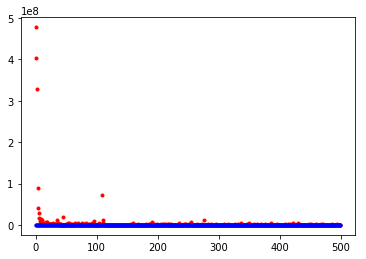

In [16]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error

modelPred = model.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

198.49643474494556

batch size 10으로 했을 때, 02:31 ~ 07:31 까지 100 epoch 학습함 / 하나당 3분

학습 크기: 493205

근데 2번이랑 100번이랑 loss변화가 없음

* DROP OUT 추가해서 성능 비교 해봐야함
* keras.optimizer.SGD(lr=0.1) 확률적 경사 하강법 learning rate 조절하는 코드
(lr=0.1, momentum=0.9,nestrove=True) 모멘텀을 추가하기도 함 / 한 단계 미리가서 거기서 경사 계산

업데이트 횟수 따라서 더 세밀하게 할지, 더 폭을 넓힐지를 결정함 / 무한대로 커지는거 방지하는것도 있음

최종 아담 코드: keras.optimzers.Adagrad(lr=0.01, epslison=1e-08, decay=0.0 (두 가지 장점 다 취함)

### first try
* LAYER(8,39,24,6,1)
* batch size 100
* learning time per epochs: 20s
* loss: 316,141,761 -> 133,509 꾸준히 줄어듬
* RMSE = <b>393.87</b> (19-04-07)

### second try - add more layers

* LAYER(8,80,160,40,20,5,1)
* batch size 100
* learning time per epochs: 30s
* loss: 107,684,961 -> 86,265 꾸준히 줄어듬, 근데 튀는 범위가 커짐
* RMSE = <b>170.43</b> (19-04-07)

### third try - add dropout(0.5) after input

* LAYER(8,80,dropout(0.5),160,40,20,5,1)
* batch size 100
* learning time per epochs: 25s
* loss: 234,290,290 -> 1,531,823 안 쓰는게 좋은듯  / 100일때 loss :3,629,611
* RMSE = <b>34259.49</b> (19-04-07)

dropout을 20과 5 사이로 옮긴결과 - epoch 100 batch 100일때 loss = 44,634,468 / rmse=33465.05

## 그림그리려고 만듦 
alidation_split=0.33, epochs=50, batch_size=500

조건 위랑 같음 - loss 217190813 / rmse 33871

87198.6413
74763710.7422   

## 그림은 그려지는데 뭔가 잘못됨
뭔가 잘못됨, RMSE 33962
앞에 지역명 잘라내고, validation split이 잘못된건가
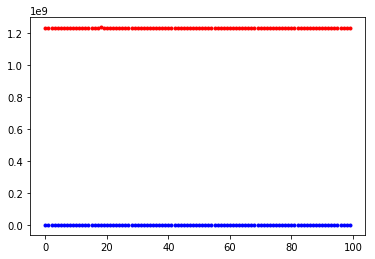

## nan을 0으로 채우니까 동작하긴함 / 나중에 평균값이나 최빈값 등 결측치는 다시 처리해야함
history를 저장 안해서 그림은 안 나왔지만 rmse가 다시 438.52 로 떨어짐

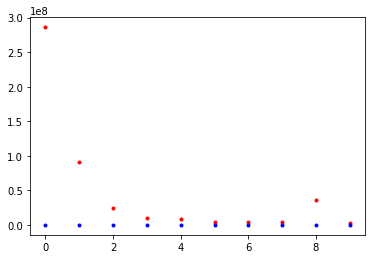
rmse 1538.20 10번만 돌림, split 개수 조정하면 괜찮아질듯

## 0.3 0.3으로 나누고 300번 돌림 / batch 5000 / layer = (15,720,1440,500,250,100,50,25,5,1)
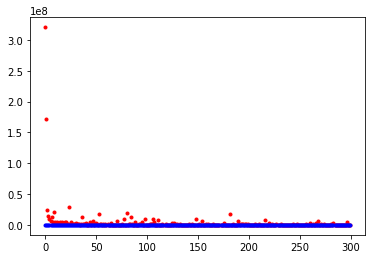

rmse 305.82 /  val_loss did not improve from 55526.14326 - 모델 폴더에 저장됨

0.3 / 0.4 로 나누고 500번 돌림 / batch 10,000 / layer 동일
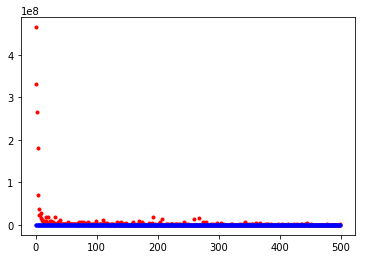
rmse 496.63 /  val_loss did not improve from 62056.57849

0.3 / 0.4로 나누고 500번 돌림 /batch 10,000 / layer 동일 / 전처리를 조금 함 -> 날짜 분리하고, 결측치많은 열 지움
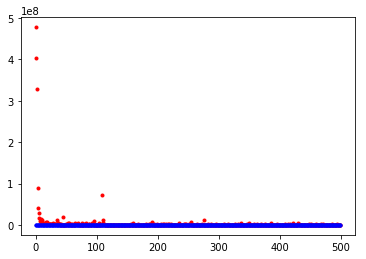

rmse = 198.49   /  val_loss did not improve from 46512.67788